In [112]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

## 3.6.2 - Simple Linear Regression
- Using least squares approach

- Constructing model matrices (design matrices) using ModelSpec() from ISLP.models
- Building a regression model to predict median house value (medv), using 13 predictor variables (e.g. rmvar = avg no of rooms per house, age, lstat = % of household with low economic status)
    - ### For simple linear regression, only using 1 predictor: response = mdv, predictor = lstat

*** Functions in use ***
- (statsmodels) sm.OLS(): OLS = 'Ordinary Least Squares'
- (ISLP) summarize(): produces a table of parameter estimates, standard errors, t-statistic, p-values

In [113]:
boston = load_data("Boston")
bost_col = boston.columns
print(bost_col)

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')


In [114]:
'''
- X = predictor variable matrix
- Creating matrix with 2 columns: intercept column containing only 1s via np.ones() function AND lstat column 
'''
X = pd.DataFrame({'intercept': np.ones(boston.shape[0]),
                 'lstat': boston['lstat']})

In [115]:
'''
y = response variable ()
- Extracting the response and fitting the model using y and X via sm.OLS() function
- sm.OLS(y, X) specifies the model based on y and X
- .fit() fits X and y to the model
'''
y = boston['medv']
model = sm.OLS(y, X)
results = model.fit()

In [116]:
'''
- summarize() is custom func in ISLP library
- Produces a table of statistical values of the fitted model
'''
summary_result = summarize(results)
print(summary_result)

              coef  std err       t  P>|t|
intercept  34.5538    0.563  61.415    0.0
lstat      -0.9500    0.039 -24.528    0.0


### Using Transformations: Fit and Transform
- Introducing transformations to variables (before fitting the model) for...
  - specifying interactions between variables OR
  - expanding particular variables into sets of variables (e.g. polynomials)

Functions in use:
- (ISLP) MS() or ModelSpec(): ISLP function to define the specifications for a model (e.g. specifies the type of regression, the default columns that'll be used in the model, etc)
- (sklearn) .fit() and transform(): fitting y and X to the model | tranforming the variables in the model
- (sklearn) .fit_tranform(): combining the .fit and .transform method to produce a model matrix
- (sklearn) .summary(): same as summarize() function (outputs the results of the OLS regression)
- (sklearn) .params: outputs the fitted coefficients (B0 = intercept and B1 = coefficient of X)
- (sklearn) .get_prediction(): obtaining predicted response values (y hat) according to values of X we want to find predictions for
- (sklearn) .conf_int(): used to get confidence and prediction intervals
  - 95% confidence interval: .conf_int(alpha = 0.05)
  - 95% prediction interval: .conf_int(obs = True, alpha = 0.05)
- (statsmodels) .get_influence(): obtains data that describes what aspects of the data have greater influence on the model and checking for outliers

In [117]:
design = MS(['lstat'])  # forms the overall design of the model matrix 
design = design.fit(boston)  # fitting lstat (predictor) and boston (response) to the model -> may do additional calculations such as computing means and sd 
X = design.transform(boston)  # produces the model matrix
'''
.fit() in the above case does little very litte; only checks if lstat (specified in design var) exists in boston array
'''

'\n.fit() in the above case does little very litte; only checks if lstat (specified in design var) exists in boston array\n'

In [118]:
# using .fit_transform() to simultaneously fit the variables to the model and making any transformations to the variables
X = design.fit_transform(boston)
print(X[:5])

   intercept  lstat
0        1.0   4.98
1        1.0   9.14
2        1.0   4.03
3        1.0   2.94
4        1.0   5.33


In [119]:
# acquiring the results from the OLS regression model
print(results.summary())
# acquiring the values of the intercept and coefficient parameters
print(results.params)  

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 09 Jan 2025   Prob (F-statistic):           5.08e-88
Time:                        19:29:36   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.0

#### Using Transformations: Obtaining predictions, confidence intervals and prediction intervals
- Finding the predicted median house value in Boston of unknown values of lstat (predictor values that are not in the dataset but values we want to predict a response for)

In [120]:
# Creating a model matrix, using the design variable, utilising values of X that we want to find predictions for
# These new values of X are unknown to the model therefore, the model must predict what their possible response is
new_df = pd.DataFrame({'lstat':[5, 10, 15]})
newX = design.transform(new_df)

# Computing the predictions (predicted medv) of newX (lstat)
new_predictions = results.get_prediction(newX)
print(new_predictions.predicted_mean)  # obtaining the predicted mean from the prediction

[29.80359411 25.05334734 20.30310057]


In [121]:
# Confidence intervals @ 95%
conf_95 = new_predictions.conf_int(alpha=0.05)
print(conf_95)
pred_95 = new_predictions.conf_int(obs=True, alpha=0.05)
print(pred_95)

[[29.00741194 30.59977628]
 [24.47413202 25.63256267]
 [19.73158815 20.87461299]]
[[17.56567478 42.04151344]
 [12.82762635 37.27906833]
 [ 8.0777421  32.52845905]]


### Defining functions (graphically representing results and data)

C:\Users\TheWorkHorseUPGRADED\AppData\Local\Temp\ipykernel_2368\3767219919.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[0], # lstat on x axis
C:\Users\TheWorkHorseUPGRADED\AppData\Local\Temp\ipykernel_2368\3767219919.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[1], # medv on y axis


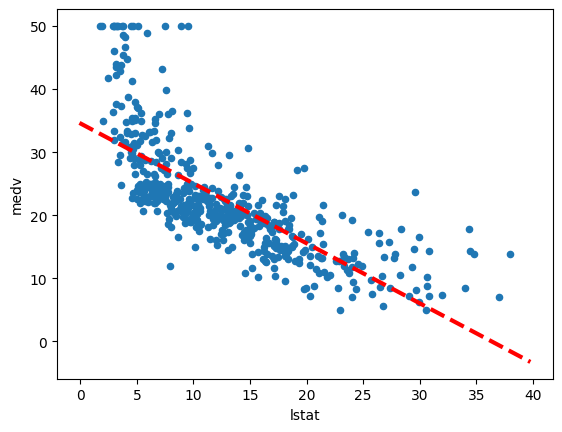

In [122]:
def abline(axObj, b, m, *args, **kwargs):
    # axObj = axis object for an existing plot (i.e. a blank plot) , b = intercept, m = slope/gradient
    # *args allows any number of non named arguments to the function
    # **kwargs allows any number of named arguments (e.g. linewidth = 3) to the function
    xlim = axObj.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    axObj.plot(xlim, ylim, *args, **kwargs)

ax = boston.plot.scatter('lstat', 'medv')
abline(ax,
      results.params[0], # lstat on x axis
      results.params[1], # medv on y axis
      'r--',
      linewidth=3)

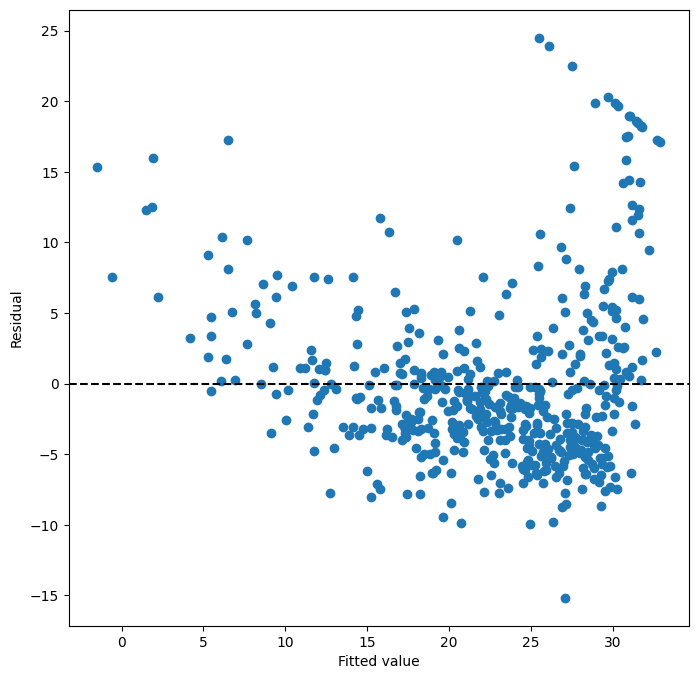

In [123]:
'''Diagnostic plots (analysing the accuracy of the date)
- Plotting the residuals against values fitted in the model
    -> data shows there is some relationship between residuals and fitted values, therefore, there is non-linearity present in the model
'''
ax = subplots(figsize=(8, 8))[1]
ax.scatter(results.fittedvalues, results.resid) 
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls = '--')  # c== k means set line colour to black | ls = '--' means to have a dashed linestyle | 0 = adding a horizontal line at 0

374


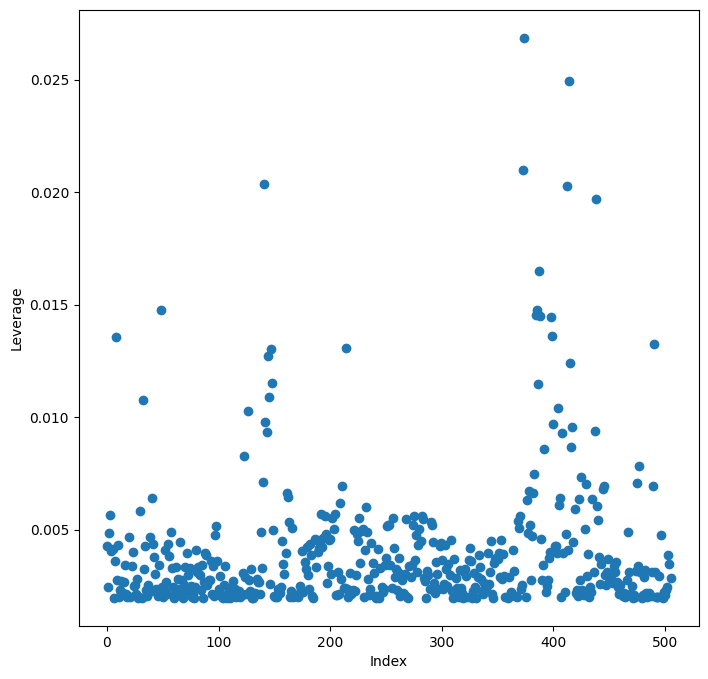

In [124]:
'''Obtaining leverage statistics
- Levearge stats used to find extreme x values; compares how far away observations are from other observations
- Good way to identify which observations may greatly skew the predicted model away from the true model
- .hat_matrix_diag used to obtain leverage statistics 
'''
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
print(np.argmax(infl.hat_matrix_diag))  # determines which observation has the largest leverage statistic

## 3.6.3 - Multiple Linear Regression
- Using least squares approach

In [125]:
'''
Multiple Linear Regression model with two predictors
'''
X = MS(['lstat', 'age']).fit_transform(boston)  # using ModelSpec to create the template for the model matrix and then, using fit_transform to create the model matrix
model1 = sm.OLS(y, X)
results1 = model1.fit()
print(summarize(results1)) 

              coef  std err       t  P>|t|
intercept  33.2228    0.731  45.458  0.000
lstat      -1.0321    0.048 -21.416  0.000
age         0.0345    0.012   2.826  0.005


In [126]:
'''
Multiple Linear Regression model with all the predictors available
'''
terms = boston.columns.drop('medv')  # we are prediciting for medv so, no need for medv column
X = MS(terms).fit_transform(boston)  # model matrix
model = sm.OLS(y, X)  # specifying the model
results = model.fit()  # fitting the data to the model
print(summarize(results))

              coef  std err       t  P>|t|
intercept  41.6173    4.936   8.431  0.000
crim       -0.1214    0.033  -3.678  0.000
zn          0.0470    0.014   3.384  0.001
indus       0.0135    0.062   0.217  0.829
chas        2.8400    0.870   3.264  0.001
nox       -18.7580    3.851  -4.870  0.000
rm          3.6581    0.420   8.705  0.000
age         0.0036    0.013   0.271  0.787
dis        -1.4908    0.202  -7.394  0.000
rad         0.2894    0.067   4.325  0.000
tax        -0.0127    0.004  -3.337  0.001
ptratio    -0.9375    0.132  -7.091  0.000
lstat      -0.5520    0.051 -10.897  0.000


In [127]:
'''
Multiple Linear Regression model but excluding a variable from the model
e.g. removing age

minus_age = Boston.columns.drop(['medv', 'age']) -> drop the column from the data set
'''


"\nMultiple Linear Regression model but excluding a variable from the model\ne.g. removing age\n\nminus_age = Boston.columns.drop(['medv', 'age']) -> drop the column from the data set\n"

## 3.6.4 - Multivariate Goodness of Fit
Variance inflation factors
- Identify collinearity and assessing its affect in the model matrix of a regression model

*** Functions in use ***
- (sklearn) VIF(): calculating VIF for a given variable
  - Takes two parameters: dataframe or array, variable column index

In [128]:
vals = [VIF(X, i) for i in range(1, X.shape[1])]
vif = pd.DataFrame({'vif':vals},
                  index=X.columns[1:])
print(vif)

              vif
crim     1.767486
zn       2.298459
indus    3.987181
chas     1.071168
nox      4.369093
rm       1.912532
age      3.088232
dis      3.954037
rad      7.445301
tax      9.002158
ptratio  1.797060
lstat    2.870777


## 3.6.5 - Interaction Terms
- Including interaction terms in the model
  - For e.g. lstat and age interact with each other (i.e. have synergy)

In [129]:
"""
- Using a tuple to tell model matrix builder to include an interaction between 2 or more predictors
"""
X = MS(['lstat',
        'age',
        ('lstat', 'age')]).fit_transform(boston)
model2 = sm.OLS(y, X)
print(summarize(model2.fit()))

              coef  std err       t  P>|t|
intercept  36.0885    1.470  24.553  0.000
lstat      -1.3921    0.167  -8.313  0.000
age        -0.0007    0.020  -0.036  0.971
lstat:age   0.0042    0.002   2.244  0.025


## 3.6.6 - Non-linear Transformations of the Predictors

***Functions used:***
- (ISLP) poly(): used to turn data into polynomial data (e.g. turning a linear dataset to a quadratic daatset)
- (statsmodels) anova_lm(): produces an ANOVA (Analysis of VAriances) table for one or more fitted linear models

In [130]:
X = MS([poly('lstat', degree=2), 'age']).fit_transform(boston)  # turns lstat into a quadratic function
model3 = sm.OLS(y, X)
results3 = model3.fit()
print(summarize(results3))

quad_vs_linear = anova_lm(results1, results3)  # comparing the orginal linear model to the new quadratic model to see which is superior)
print(quad_vs_linear)

                              coef  std err       t  P>|t|
intercept                  17.7151    0.781  22.681    0.0
poly(lstat, degree=2)[0] -179.2279    6.733 -26.620    0.0
poly(lstat, degree=2)[1]   72.9908    5.482  13.315    0.0
age                         0.0703    0.011   6.471    0.0
   df_resid           ssr  df_diff      ss_diff           F        Pr(>F)
0     503.0  19168.128609      0.0          NaN         NaN           NaN
1     502.0  14165.613251      1.0  5002.515357  177.278785  7.468491e-35


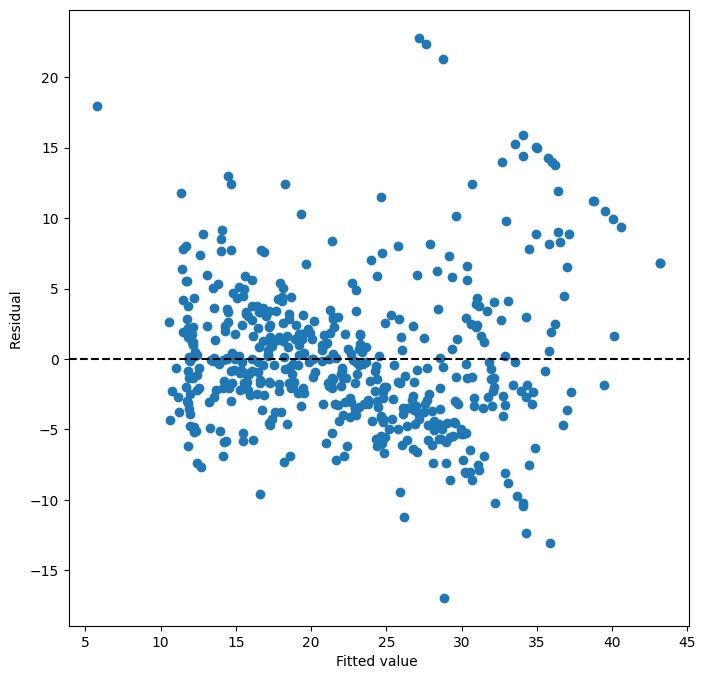

In [131]:
'''
Checking if there isn't any further aspects of non-linearity in the model
-> there is no discernable pattern from the scatter graph therefore, no further changes needed 
'''
ax = subplots(figsize =(8 ,8))[1]
ax.scatter(results3.fittedvalues , results3.resid)
ax.set_xlabel('Fitted value ')
ax.set_ylabel('Residual ')
ax.axhline(0, c='k', ls='--')

## 3.6.7 - Qualitative Predictors
This tutorial uses the Carseats dataset from the ISLP package